## Datetimes & time series

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
weather=pd.read_csv("weather_data_austin_2010.csv")
weather.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [2]:
type(weather)

pandas.core.frame.DataFrame

In [3]:
type(weather.index)

pandas.core.indexes.range.RangeIndex

In [4]:
# change col to datetime
weather["Date"] = pd.to_datetime(weather["Date"])

# move Date as an index
weather = weather.set_index('Date')

In [5]:
type(weather.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


## Plottign Dataframes
- all columns
- not very usefull
    - two of the curves are dense band and the 3rd is a too small
    - dates are mushed together

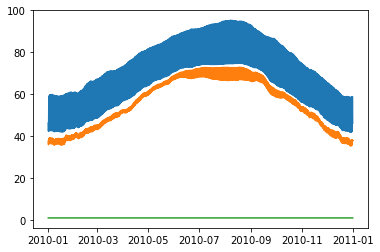

In [7]:
plt.plot(weather)
plt.show()

## Time Series

- Pandas time series: *datetime* as *index*
- Datetime: represents perios or time-stamp
- Datetime index: specialized slicking
    - `weather['2010-07-04']`: slices all 24hr mesurments from July 4th 2010
    - `weather['2010-03':'2010-04']`: slices all hourly measurments from 61 days making up from march-april 2010 INCLUSIVE
    - `weather['2010-05']`: slices the month of May 2010 

In [8]:
temperature = weather['Temperature']

In [9]:
march_apr = temperature['2010-03':'2010-04']  # data of march & april 2010 only

march_apr.shape

(1463,)

In [10]:
march_apr.iloc[-4:]  # extracts last 4 entries from time series

Date
2010-04-30 20:00:00    73.3
2010-04-30 21:00:00    71.3
2010-04-30 22:00:00    69.7
2010-04-30 23:00:00    68.5
Name: Temperature, dtype: float64

## Plotting time series slickes

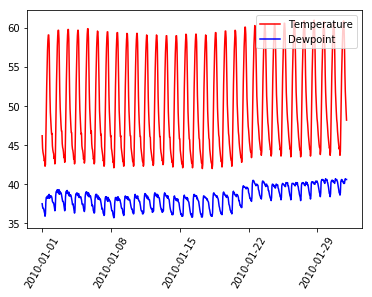

In [11]:
plt.plot(temperature['2010-01'], color='red',
        label='Temperature')

dew_point = weather['DewPoint']

plt.plot(dew_point['2010-01'], color='blue',
        label='Dewpoint')

plt.legend(loc='upper right')
plt.xticks(rotation=60)

plt.show()

## Selecting & formatting dates
- fix messy tic marks
- slice `[::96]`, stride 96, from the index of the time series, that is every 96th element from that time series
Since the data is collected hourly, this picks out  th start of every 4th day.

$96 \div 24\ hrs = 4\ days$


In [12]:
jan = temperature['2010-01']

dates = jan.index[::96]  # pick every 4th day
print(dates)

DatetimeIndex(['2010-01-01', '2010-01-05', '2010-01-09', '2010-01-13',
               '2010-01-17', '2010-01-21', '2010-01-25', '2010-01-29'],
              dtype='datetime64[ns]', name='Date', freq=None)


Convert them into a list of  formatted labels using the `.strftime()` method of the datetime index object.

It basically converts it to "Human" readable format

In [13]:
labels = dates.strftime('%b %d')  # make formatted labels
print(labels)

['Jan 01' 'Jan 05' 'Jan 09' 'Jan 13' 'Jan 17' 'Jan 21' 'Jan 25' 'Jan 29']


## Cleaning up ticks on axis

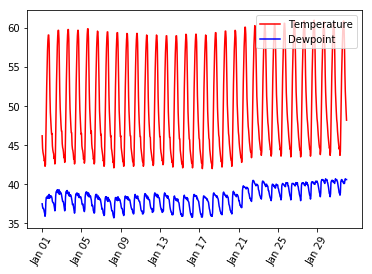

In [14]:
plt.plot(temperature['2010-01'], color='red',
        label='Temperature')

plt.plot(dew_point['2010-01'], color='blue',
        label='Dewpoint')

plt.xticks(dates, labels, rotation=60)
plt.legend(loc='upper right')

plt.show()

In [15]:
# load dataset

stocks = pd.read_csv('stocks.csv')
#stocks.info()
# aapl = stocks['AAPL']
# ibm = stocks['IBM']
# csco = stocks['CSCO']
# msft = stocks['MSFT']

aapl = pd.Series(stocks['AAPL'].values, index=stocks['Date'])
ibm = pd.Series(stocks['IBM'].values, index=stocks['Date'])
csco = pd.Series(stocks['CSCO'].values, index=stocks['Date'])
msft = pd.Series(stocks['MSFT'].values, index=stocks['Date'])

In [16]:
#stocks.head()
#type(aapl.index)
aapl.head()

Date
2000-01-03    111.937502
2000-01-04    102.500003
2000-01-05    103.999997
2000-01-06     94.999998
2000-01-07     99.500001
dtype: float64

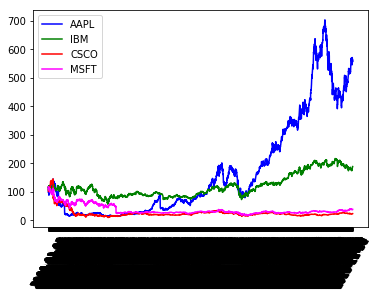

In [17]:

## Example
# Multiple time series on common axes



# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()

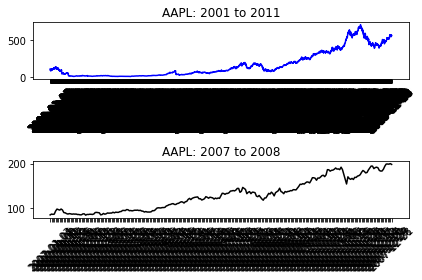

In [18]:
## Example
# Multiple time series slices (1)
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()


KeyError: '2008-01'

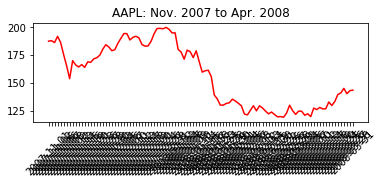

In [19]:
## Example
# Multiple time series slices (2)
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.plot(view, color='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation=45)

# Reassign the series by slicing the month January 2008
view = aapl['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.plot(view,color='green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation=45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

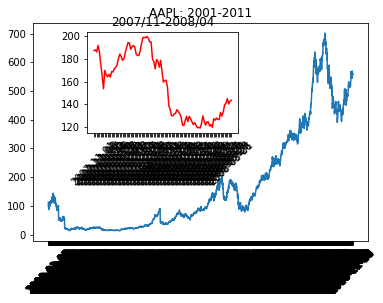

In [20]:
## EXAMPLE
# Plotting an inset view
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25, 0.5, 0.35, 0.35])

# Plot the sliced series in red using the current axes
plt.plot(view,color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()



# Time series with moving window 
## Moving windows & time series

- moving window calculation
    - averages
    - medians
    - standar deviations
- Extracts informatino onlinger time scales
- see pandas counses on houw to compute

## Moving averages
```python
In [1]: smoothed.info() # smoothed computing using moving averages
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31
23:00:00
Data columns (total 5 columns):
14d 8424 non-null float64
1d 8736 non-null float64
3d 8688 non-null float64
7d 8592 non-null float64
dtypes: float64(5)
memory usage: 410.6 KB

In [2]: print(smoothed.iloc[:3,:])
 14d 1d 3d 7d Temperature
Date
2010-01-01 00:00:00 NaN NaN NaN NaN 46.2
2010-01-01 01:00:00 NaN NaN NaN NaN 44.6
2010-01-01 02:00:00 NaN NaN NaN NaN 44.1

```



In [27]:
!ls img

04-0.PNG  04-1.PNG  04-2.PNG  04-3.PNG


## Viewing 24 hr averages


```python
In [1]: plt.plot(smoothed['1d']) # moving average over 24 hours
In [2]: plt.title('Temperature (2010)')
In [3]: plt.xticks(rotation=60)
In [4]: plt.show()
```
![title](img/04-0.PNG)

## Viewing all moving averages

```python
In [1]: plt.plot(smoothed['2010-01']) # plot
 ...: DataFrame for January
In [2]: plt.legend(smoothed.columns)
In [3]: plt.title('Temperature (Jan. 2010)')
In [4]: plt.xticks(rotation=60)
In [5]: plt.show()

```

![title](img/04-1.PNG)

## Moving Standar deviation

```python
In [1]: plt.plot(variances['2010-01'])
In [2]: plt.legend(variances.columns)
In [3]: plt.title('Temperature deviations (Jan. 2010)')
In [4]: plt.xticks(rotation=60)
In [5]: plt.show()


```
![title](img/04-3.PNG)

NameError: name 'mean_30' is not defined

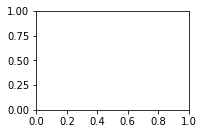

In [28]:
## EXAMPLE
# Plotting moving averages
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30,color = 'green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, color='magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2,2,4)
plt.plot(mean_250, color='cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()

In [29]:
## EXAMPLE
# Plotting moving standard deviations

# Plot std_30 in red
plt.plot(std_30, color='red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, color='cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125, color='green', label='125d')

# Plot std_250 in magenta
plt.plot(std_250,color='magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc="upper left")

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()

NameError: name 'std_30' is not defined

# Histogram equalization images



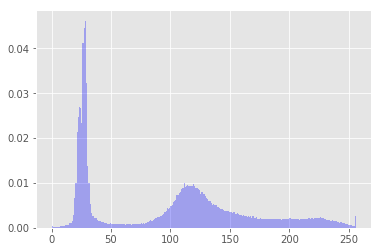

0 255


In [46]:
orig = plt.imread('img/moon2.jpg')
plt.style.use('ggplot')

pixels = orig.flatten()

plt.hist(pixels, bins=256, range=(0,256), normed=True,
        color='blue', alpha=0.3)

plt.show()
minval, maxval = orig.min(), orig.max()
print(minval, maxval)

## Rescaling the image

In [47]:
rescaled = (255/(maxval-minival)) * (pixels - minival)
print(rescaled.min(), rescaled.max())



0.0 255.0


TypeError: Invalid dimensions for image data

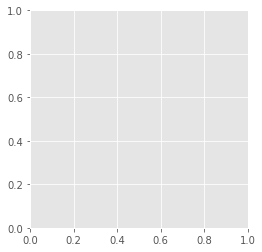

In [48]:
plt.imshow(rescaled)
plt.axis('off')
plt.show()

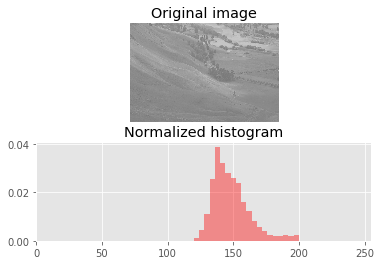

In [59]:
## EXAMPLE
# Extracting a histogram from a grayscale image


# Load the image into an array: image
image = plt.imread('Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0,256),normed=True,color='red', alpha=0.4)

# Display the plot
plt.show()

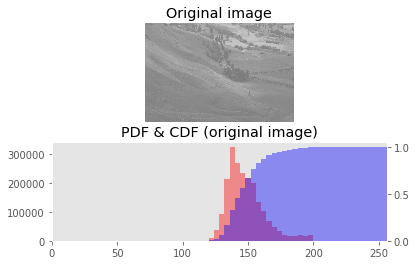

In [60]:
## EXAMPLE
# Cumulative Distribution Function from an image histogram

# Load the image into an array: image
image = plt.imread('Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               normed=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()





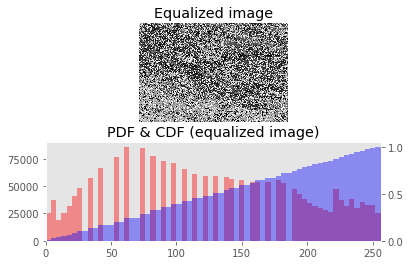

In [63]:
## EXAMPLE
# Equalizing an image histogram

# Load the image into an array: image
image = plt.imread('Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image,cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()

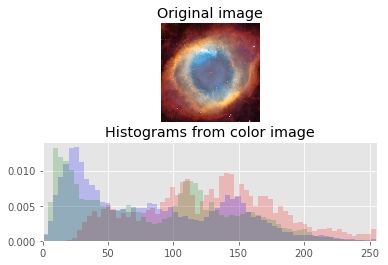

In [64]:
## EXAMPLE
# Extracting histograms from a color image

# Load the image into an array: image
image = plt.imread('img/hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show()


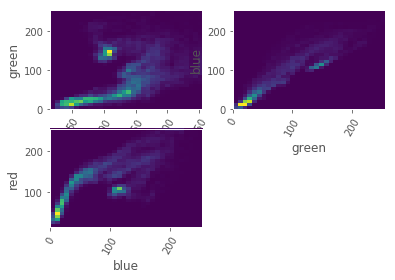

In [65]:
#EXAMPLE
# Extracting bivariate histograms from a color image
# Load the image into an array: image
image = plt.imread('img/hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels,green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins= (32,32))

# Display the plot
plt.show()


